In [1]:
import os
os.chdir ('/projects/bbhj/asinha15/VLQ-NN-Reweighting/main/DNN')

In [2]:
import numpy as np
import sklearn
import shap
import time
import torch
import pandas as pd
from Data import CSVData
import matplotlib.pyplot as plt

In [3]:
if torch.cuda.is_available():
    device='cuda'
else:
    device='cpu'

In [4]:
features = ['mode',
'Msim',
'Gsim',
'weight',
'pz_in1',
'pid_in1', 
'pz_in2',
'pid_in2',
'px_out1',
'py_out1',
'pz_out1',
'e_out1',
'pid_out1',
'px_out2',
'py_out2',
'pz_out2',
'e_out2',
'pid_out2',
'px_out3',
'py_out3',
'pz_out3',
'e_out3',
'pid_out3',
'px_out4',
'py_out4',
'pz_out4',
'e_out4',
'pid_out4',
'Mtarget',
'Gtarget',]
label = 'f_rwt'
features_to_rescale = ['Msim',
'Gsim',
'pz_in1', 
'pz_in2',
'px_out1',
'py_out1',
'pz_out1',
'e_out1',
'px_out2',
'py_out2',
'pz_out2',
'e_out2',
'px_out3',
'py_out3',
'pz_out3',
'e_out3',
'px_out4',
'py_out4',
'pz_out4',
'e_out4',
'Mtarget',
'Gtarget']

In [5]:
model_path = '/projects/bbhj/asinha15/VLQ-NN-Reweighting/main/trained_models/HuberLoss()1.pt'
model = torch.jit.load(model_path).to(device)
model.eval()

RecursiveScriptModule(
  original_name=Sequential
  (Linear0): RecursiveScriptModule(original_name=Linear)
  (Activation0): RecursiveScriptModule(original_name=LeakyReLU)
  (Linear1): RecursiveScriptModule(original_name=Linear)
  (Activation1): RecursiveScriptModule(original_name=LeakyReLU)
  (Linear2): RecursiveScriptModule(original_name=Linear)
  (Activation2): RecursiveScriptModule(original_name=LeakyReLU)
  (Linear3): RecursiveScriptModule(original_name=Linear)
  (Activation3): RecursiveScriptModule(original_name=LeakyReLU)
  (Linear_last): RecursiveScriptModule(original_name=Linear)
)

In [6]:
def f(X):
    inputs = torch.Tensor(X).to(device)
    with torch.no_grad():
        outputs = model(inputs).to('cpu').numpy().flatten()
    return outputs

In [7]:
train_data = CSVData(batch_size=1024, features_name=features, labels_name=label, features_to_rescale= features_to_rescale, file_names=['/projects/bbhj/asinha15/train_' + str(i)+'.csv' for i in range(0,10)])

In [8]:
X, Y = train_data.load_data_many()
X = pd.DataFrame(np.array(X))
Y = Y.flatten()
X.columns = features

In [9]:
shap.initjs()

explainer = shap.SamplingExplainer(f, X.sample(n=100))
shap_values = explainer.shap_values(X.iloc[299,:])
shap.force_plot(explainer.expected_value, shap_values, X.iloc[299,:])

In [10]:
import warnings

warnings.filterwarnings('ignore')

In [11]:
X_subset=X.sample(n=2000) #finding the shap values for 2000 events
shap_values2000 = explainer.shap_values(X_subset, np_samples=50)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [12]:
warnings.filterwarnings('default')

In [13]:
#shap.force_plot(explainer.expected_value, shap_values2000, X_subset)

In [14]:
X_subset = X_subset.reset_index()

In [15]:
del X_subset['index']

In [16]:
X_subset

,mode,Msim,Gsim,weight,pz_in1,pid_in1,pz_in2,pid_in2,px_out1,py_out1,...,pz_out3,e_out3,pid_out3,px_out4,py_out4,pz_out4,e_out4,pid_out4,Mtarget,Gtarget
0,-1.0,2300.0,1150.0,0.006294,1102.900674,21.0,-1955.241804,2.0,34.945547,-8.413334,...,587.901487,866.837912,5.0,65.552366,-61.208732,186.955616,207.408086,-5.0,2300.0,1150.0
1,1.0,1700.0,850.0,0.024110,720.211431,21.0,-1960.451461,2.0,7.293940,-36.404508,...,-122.353786,818.980595,6.0,2.185007,7.140096,120.651275,120.973449,-5.0,1900.0,380.0
2,-1.0,1500.0,750.0,0.106466,2776.555372,2.0,-578.315035,21.0,14.302544,-32.128313,...,436.155740,871.095051,5.0,14.050598,-15.164698,-242.061642,242.988304,-5.0,1300.0,325.0
3,1.0,1700.0,425.0,0.014262,706.061674,21.0,-1387.337806,2.0,35.470622,-42.571593,...,531.094470,634.628780,6.0,-25.488328,1.393887,87.979765,91.728550,-5.0,1700.0,850.0
4,-1.0,2300.0,1150.0,0.006294,1734.371166,2.0,-1164.056589,21.0,-22.321022,47.017569,...,413.144861,1190.540631,5.0,-5.383235,5.505187,-28.569743,29.960082,-5.0,2100.0,840.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,2300.0,575.0,0.006189,1373.298873,2.0,-2215.475848,21.0,22.586016,-28.104215,...,-446.828406,1055.839994,6.0,9.267416,-1.439415,-91.341947,91.942364,-5.0,2400.0,1080.0
1996,0.0,1100.0,275.0,0.232179,574.491394,21.0,-2362.355718,2.0,-0.101942,-75.246713,...,-182.244418,475.965227,6.0,-126.703741,-188.988951,-204.063225,305.670659,-5.0,900.0,180.0
1997,1.0,1300.0,325.0,0.071254,1915.333620,1.0,-830.863107,21.0,-71.339017,-6.097928,...,-186.076558,696.503915,-6.0,-6.837495,5.731107,-81.953154,82.571220,5.0,1500.0,675.0
1998,1.0,2100.0,1050.0,0.005919,2403.287781,2.0,-1073.287732,21.0,10.547388,26.256761,...,-629.210452,919.490150,6.0,52.235865,-268.840493,-164.729200,319.627276,-5.0,2200.0,1100.0


In [17]:
X_subset.shape

(2000, 30)

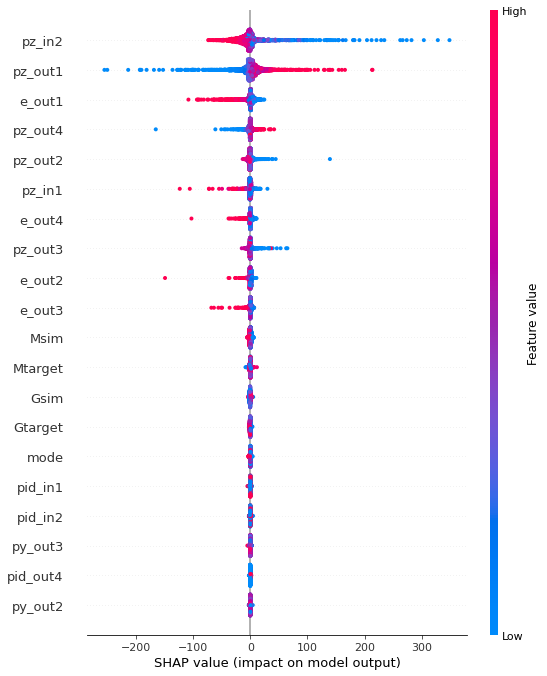

In [18]:
shap.summary_plot(shap_values2000, X_subset)

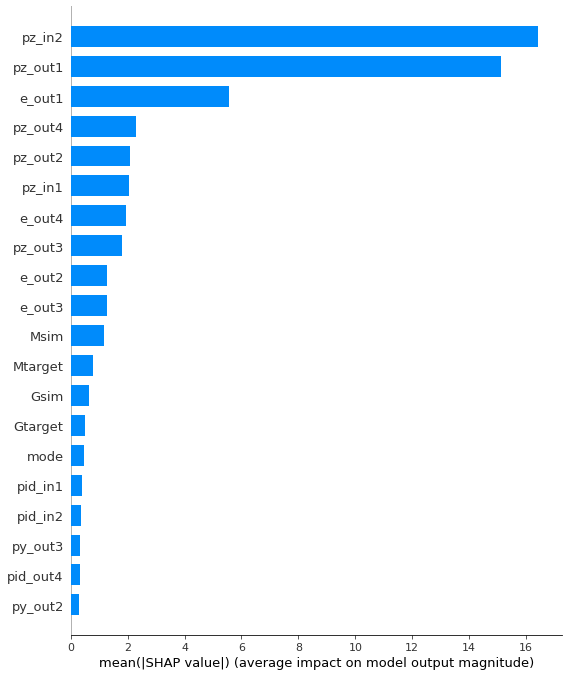

In [19]:
shap.summary_plot(shap_values2000, X_subset, plot_type='bar')

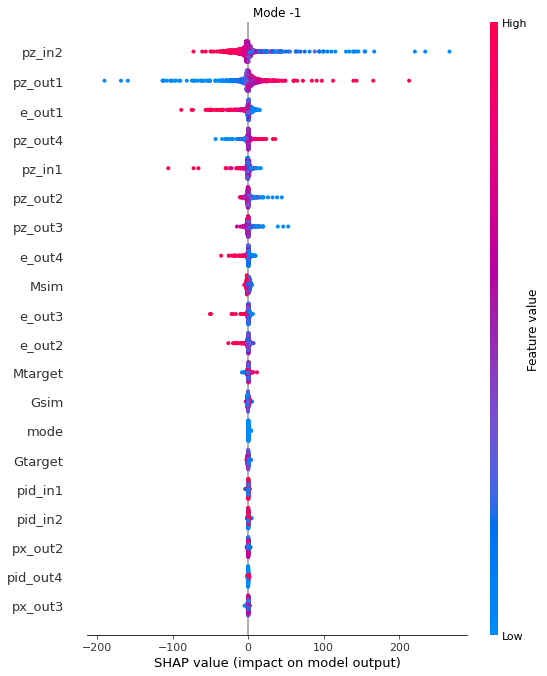

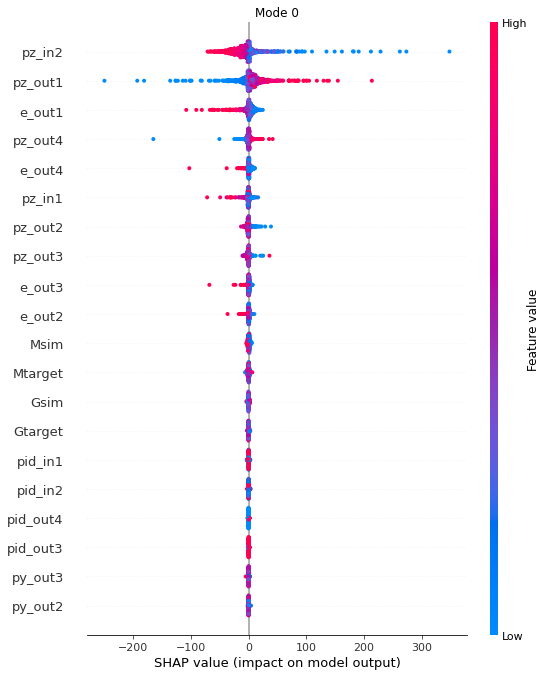

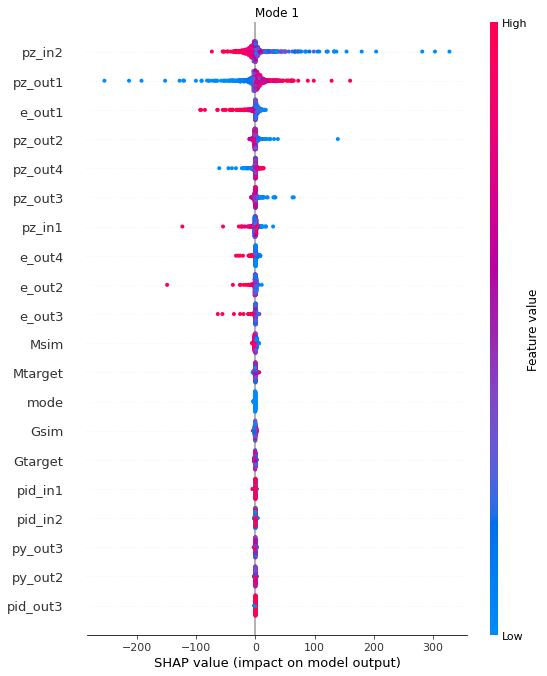

In [20]:
modes = [-1,0,1]
for i, b in enumerate(modes):
    plt.title(f"Mode {b}")
    idx = X_subset.index[X_subset['mode']==b].tolist()
    X_subsubset = pd.DataFrame([X_subset.iloc[idxi,:] for idxi in idx])
    shap.summary_plot(np.array([shap_values2000[idxi,:] for idxi in idx]), X_subsubset)
    del X_subsubset

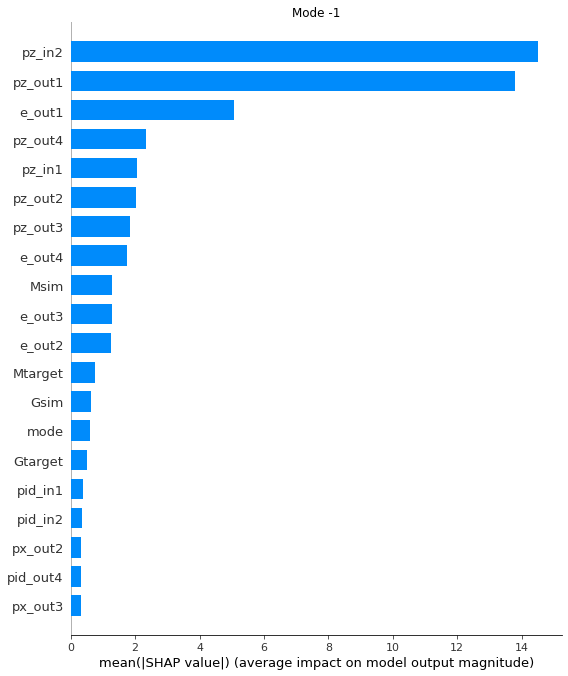

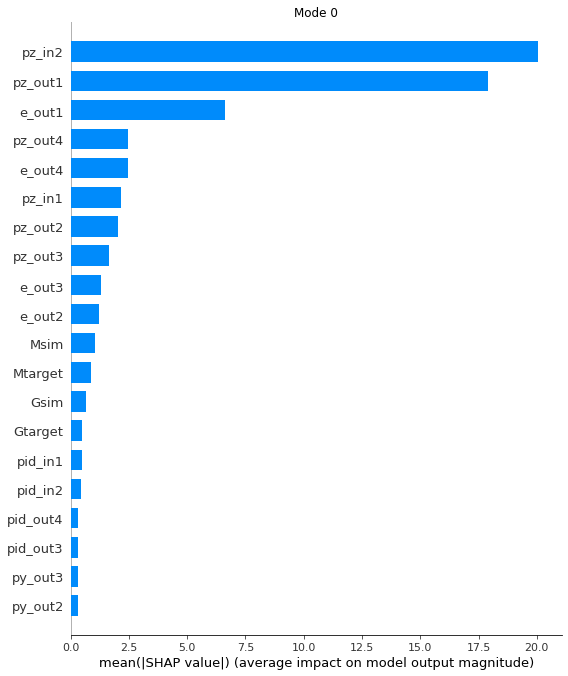

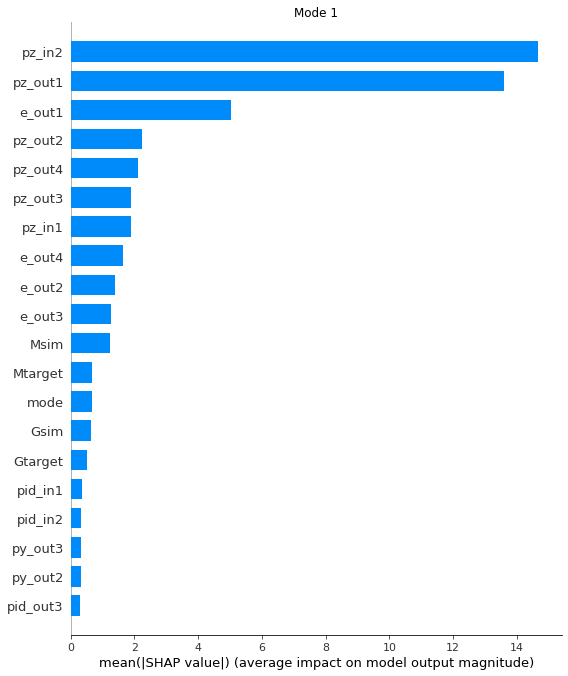

In [21]:
for i, b in enumerate(modes):
    plt.title(f"Mode {b}")
    idx = X_subset.index[X_subset['mode']==b].tolist()
    X_subsubset = pd.DataFrame([X_subset.iloc[idxi,:] for idxi in idx])
    shap.summary_plot(np.array([shap_values2000[idxi,:] for idxi in idx]), X_subsubset, plot_type='bar')
    del X_subsubset

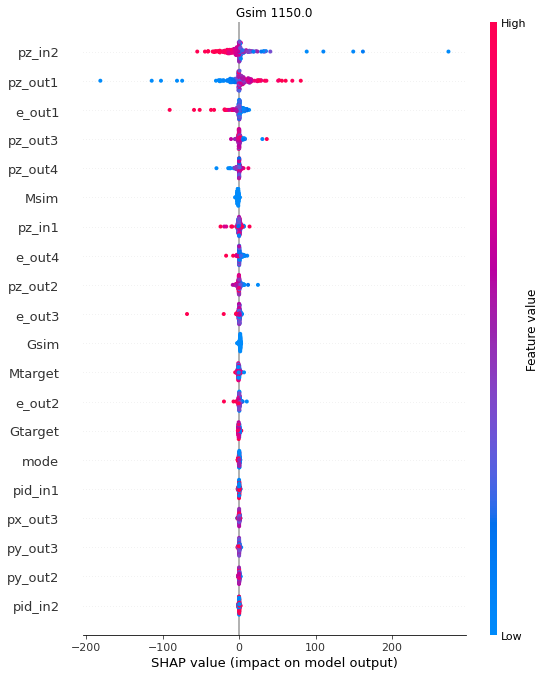

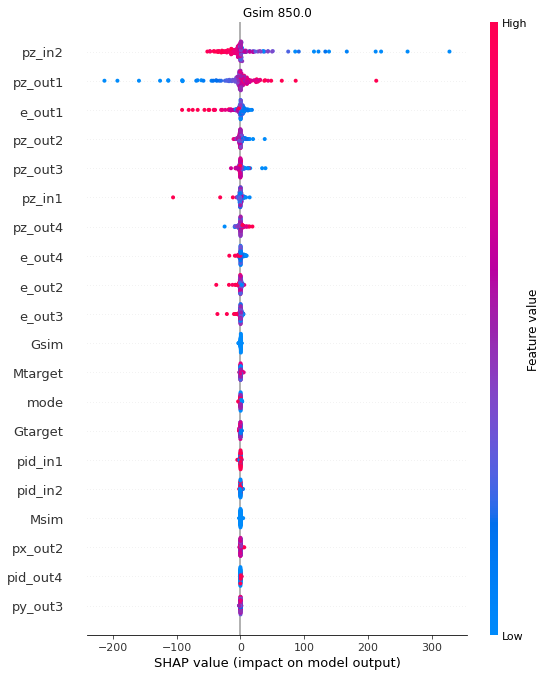

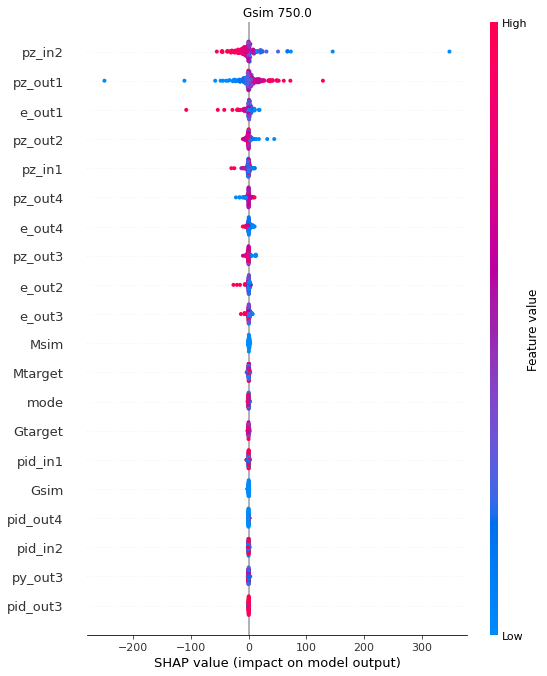

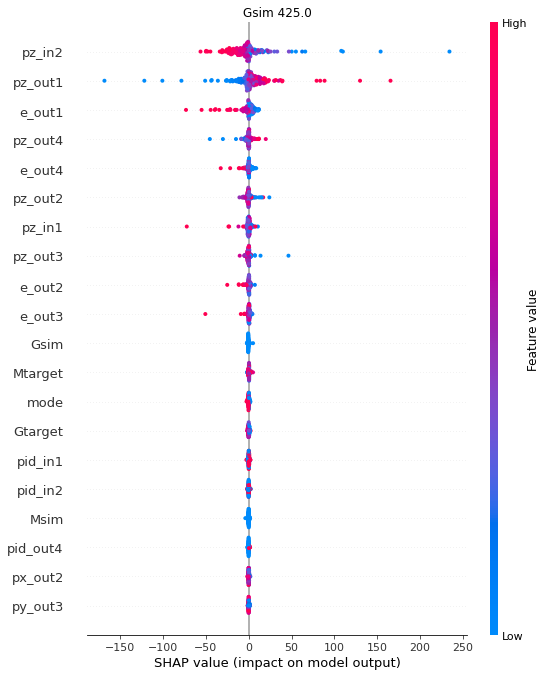

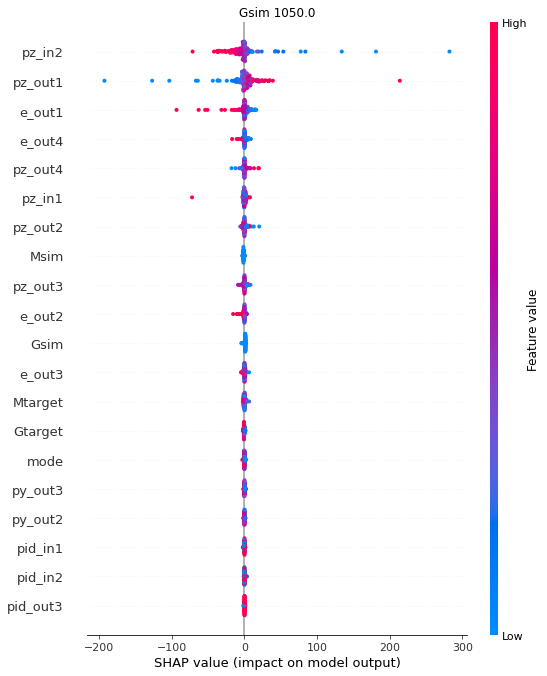

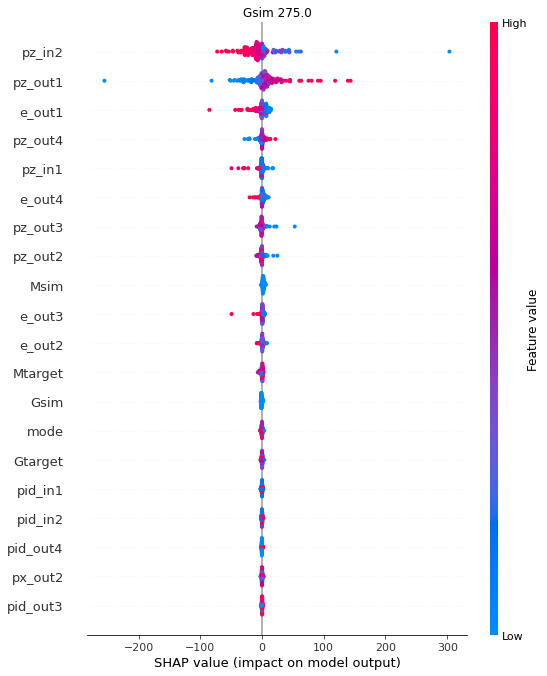

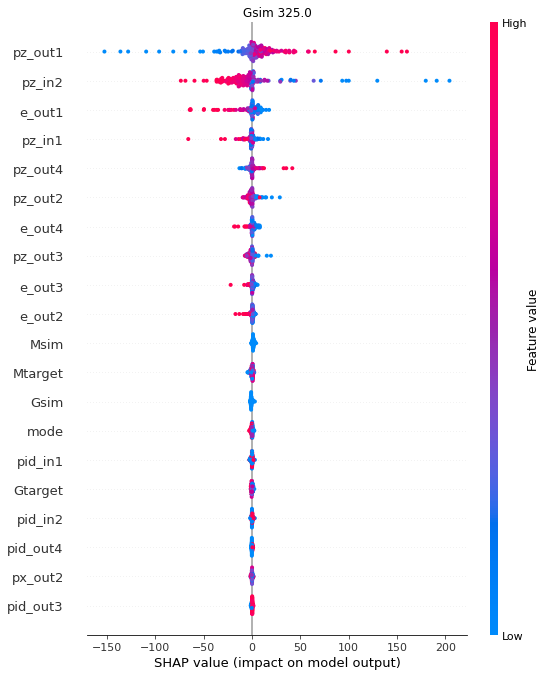

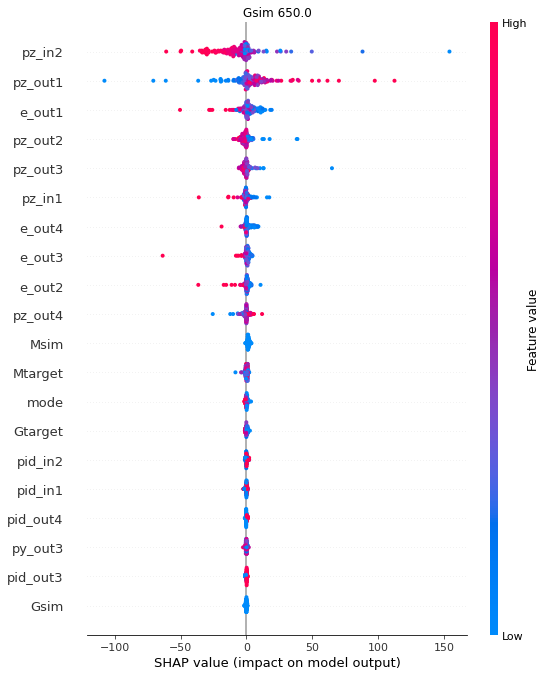

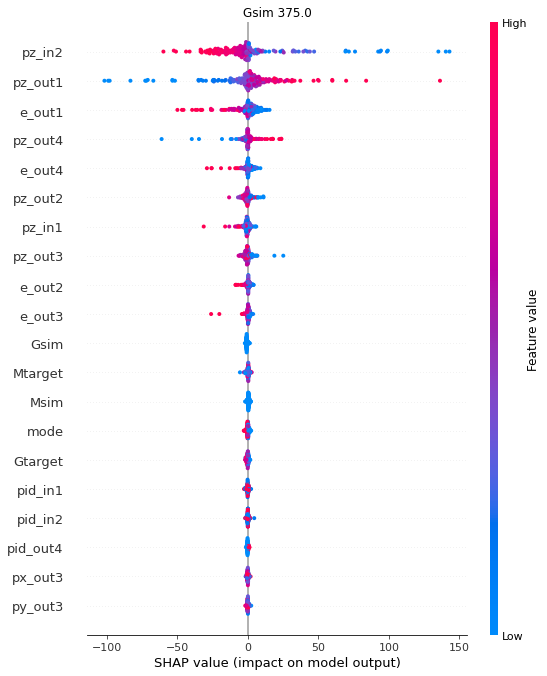

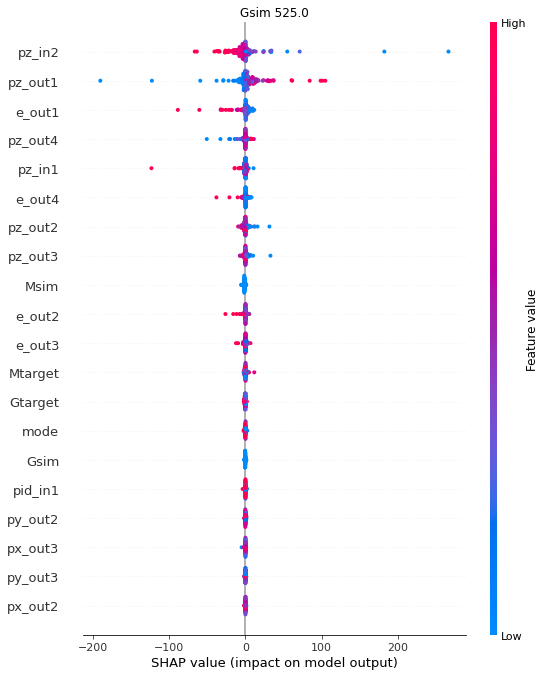

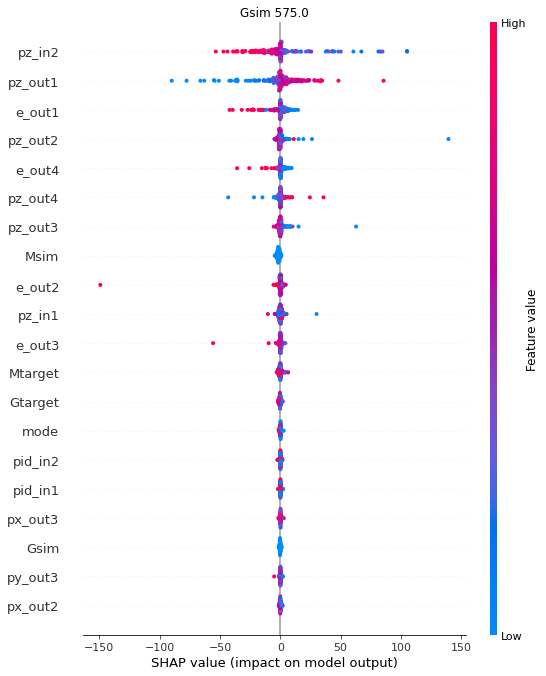

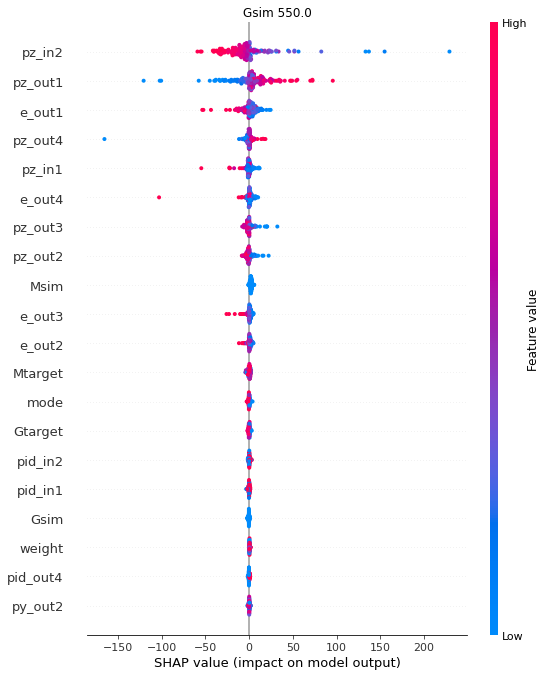

In [22]:
Gsims = X_subset.Gsim.unique()
for i, b in enumerate(Gsims):
    plt.title(f"Gsim {b}")
    idx = X_subset.index[X_subset['Gsim']==b].tolist()
    X_subsubset = pd.DataFrame([X_subset.iloc[idxi,:] for idxi in idx])
    shap.summary_plot(np.array([shap_values2000[idxi,:] for idxi in idx]), X_subsubset)
    del X_subsubset

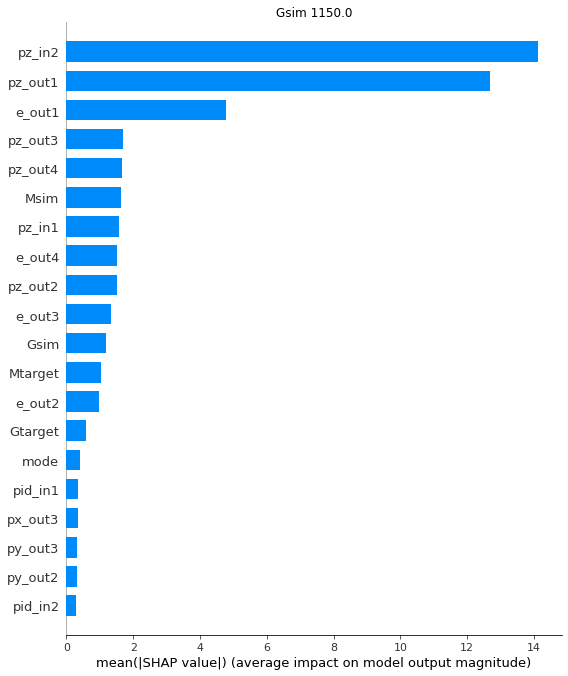

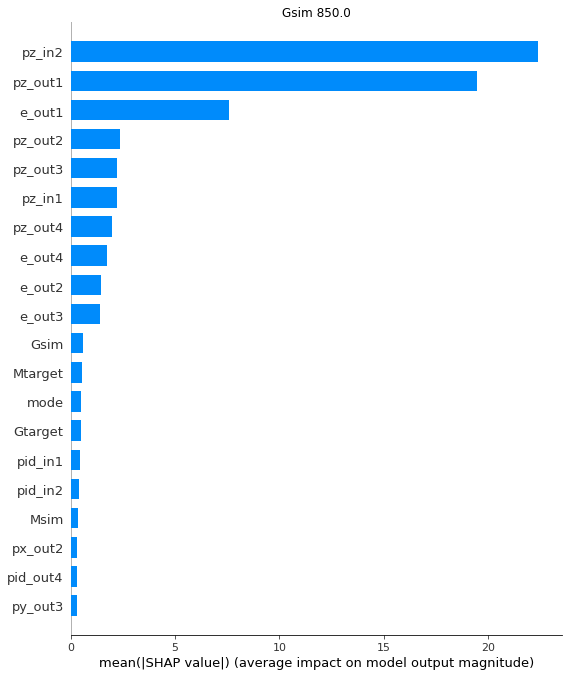

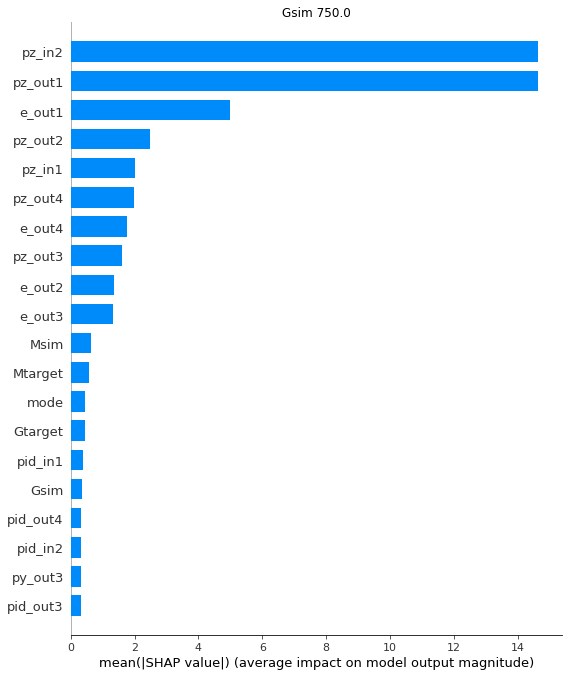

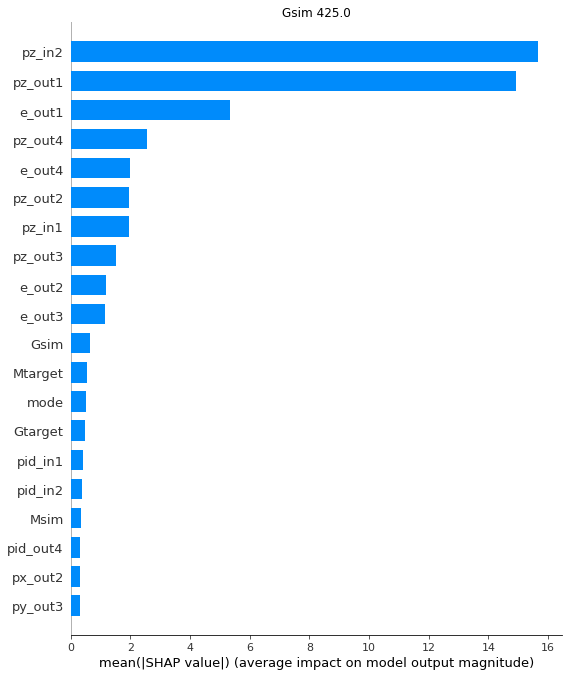

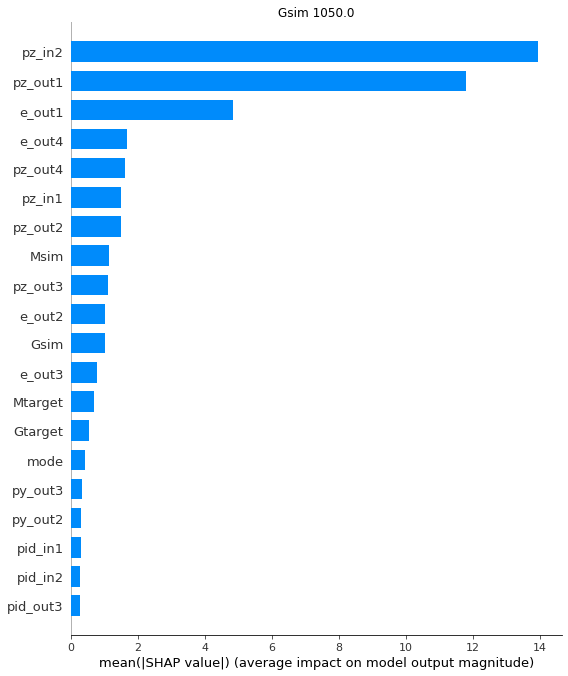

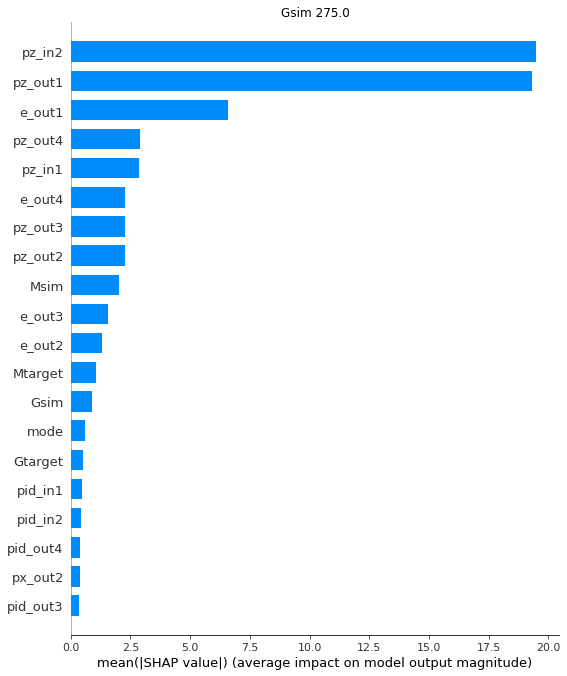

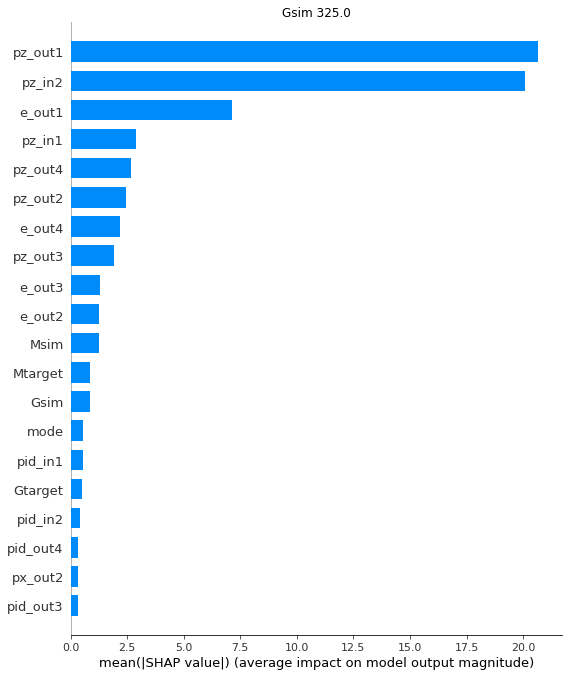

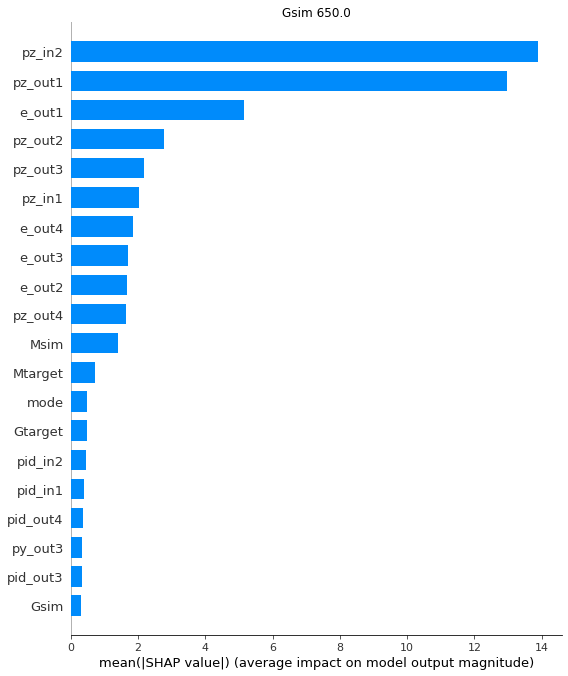

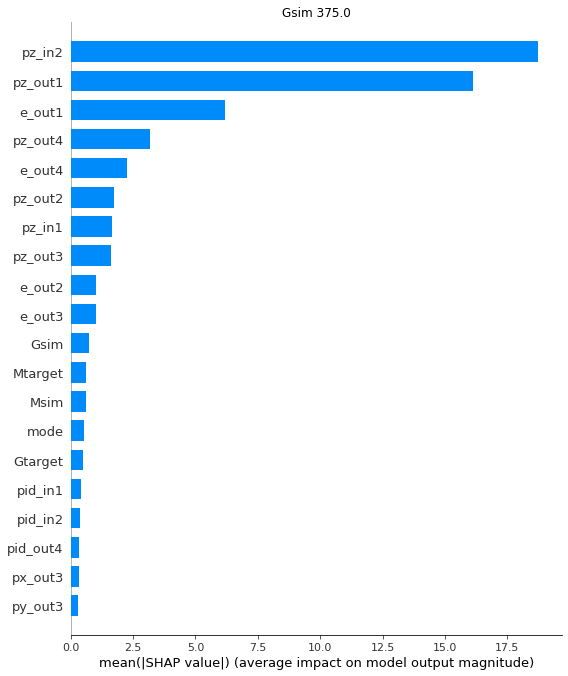

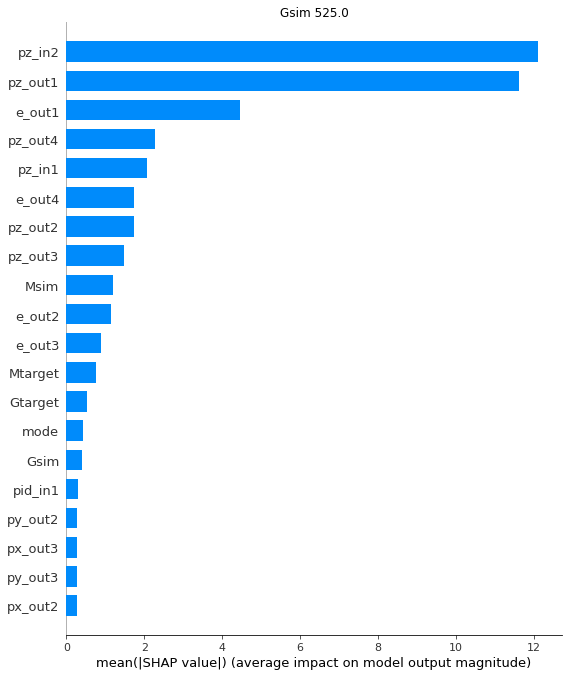

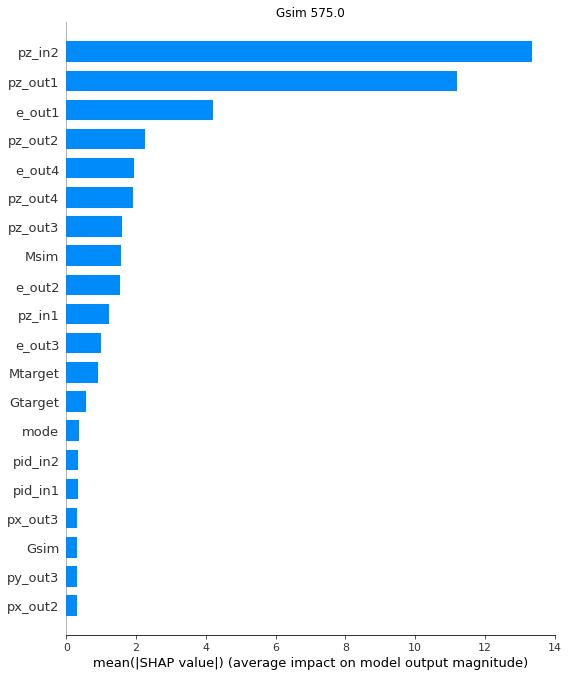

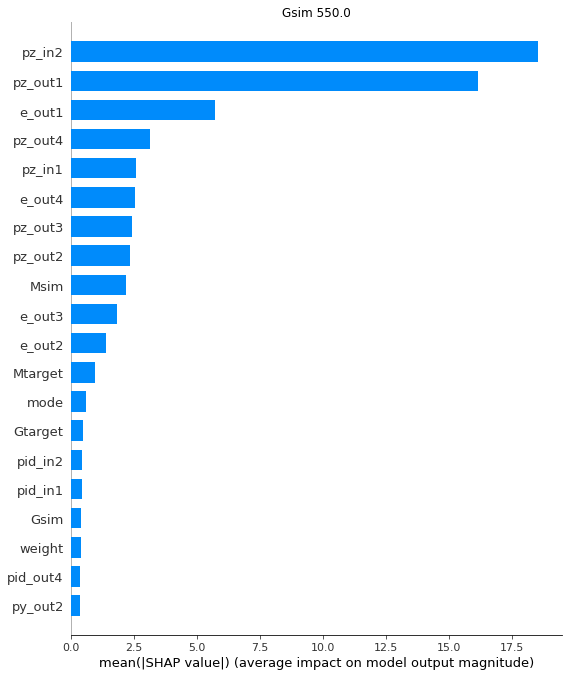

In [23]:
for i, b in enumerate(Gsims):
    plt.title(f"Gsim {b}")
    idx = X_subset.index[X_subset['Gsim']==b].tolist()
    X_subsubset = pd.DataFrame([X_subset.iloc[idxi,:] for idxi in idx])
    shap.summary_plot(np.array([shap_values2000[idxi,:] for idxi in idx]), X_subsubset, plot_type='bar')
    del X_subsubset

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

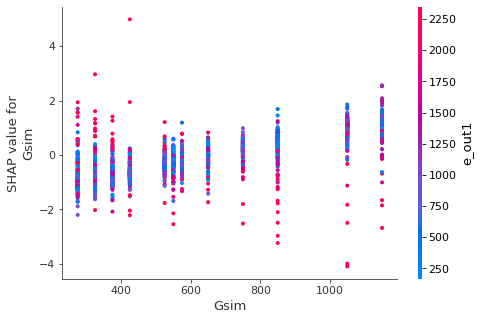

In [24]:
shap.dependence_plot('Gsim', shap_values2000, X_subset)

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

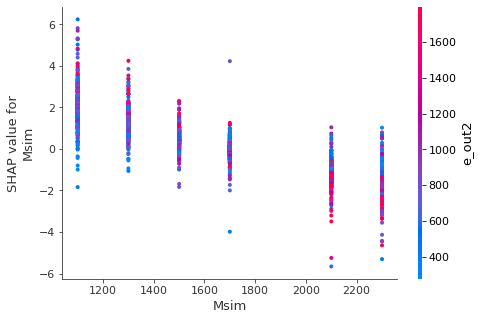

In [25]:
shap.dependence_plot('Msim', shap_values2000, X_subset)

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

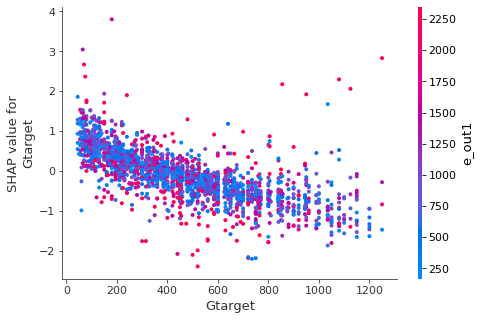

In [26]:
shap.dependence_plot('Gtarget', shap_values2000, X_subset)

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

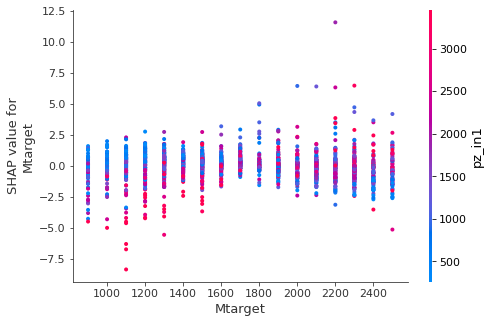

In [27]:
shap.dependence_plot('Mtarget', shap_values2000, X_subset)

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

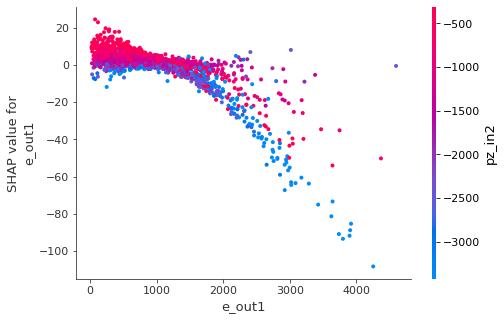

In [28]:
shap.dependence_plot('e_out1', shap_values2000, X_subset)